
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 




### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Load the file as a dataframe 
df = pd.read_csv('/content/drive/My Drive/SHALA2020/train.csv')
movies = pd.read_csv('/content/drive/My Drive/SHALA2020/moviesData.csv')

In [41]:
# Print the first ten rows of df
df.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [42]:
# Print the first five rows of MonthlyRate
df.MonthlyRate.head()

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [43]:
# Find the details of MonthlyRate 
df.MonthlyRate.describe()


count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [45]:
# Check for missing values 
df.isna().sum()
print(df.isna().sum)

# Drop the missing values 
df_drop = df.dropna() # Drop the na datapoints 

# Print the size of df after dropping

df_drop.shape


<bound method DataFrame.sum of         Age  Attrition  ...  YearsWithCurrManager     ID
0     False      False  ...                 False  False
1     False      False  ...                 False  False
2     False      False  ...                 False  False
3     False      False  ...                 False  False
4     False      False  ...                 False  False
...     ...        ...  ...                   ...    ...
1023  False      False  ...                 False  False
1024  False      False  ...                 False  False
1025  False      False  ...                 False  False
1026  False      False  ...                 False  False
1027  False      False  ...                 False  False

[1028 rows x 34 columns]>


(1028, 34)

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [46]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = (df['MonthlyRate']-df.MonthlyRate.mean())/df.MonthlyRate.std()
df['MonthRateNew'].head()

0    0.742749
1    1.512813
2   -1.680795
3    1.264827
4    0.338849
Name: MonthRateNew, dtype: float64

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [47]:
# Check for missing values 
movies.isna().sum()
#print(movies.isna().sum())
#movies.head()

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64

In [48]:
movies2 = movies.dropna()
print(movies2.shape)

(572, 31)


In [84]:
from sklearn.impute import SimpleImputer
mov_num = movies.select_dtypes(include=np.number)
mov_cat = movies.select_dtypes(exclude= np.number)
mov_num.describe()
# For numerical values, replace nan with mean
impute = SimpleImputer(missing_values=np.nan, strategy='mean') #or use 'median'
imputed = impute.fit(mov_num)
df1 = pd.DataFrame(imputed.transform(mov_num), columns=mov_num.columns)
# print(df1)
# mov_num.columns
# print(df1.head())
# # For categorical values
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #or use 'median'
imputed = impute.fit(mov_cat)
df2 = pd.DataFrame(imputed.transform(mov_cat), columns= mov_cat.columns)
#print(df2)
mov_new_dataf = df1.join(df2)
print(mov_new_dataf.head())


   Unnamed: 0  runtime  ...            actor4               actor5
0         1.0     80.0  ...     Emilio Rivera  Joseph Julian Soria
1         2.0    101.0  ...          Tom Long       Genevieve Mooy
2         3.0     84.0  ...       Eugene Levy          Bob Balaban
3         4.0    139.0  ...  Richard E. Grant         Alec McCowen
4         5.0     90.0  ...     Heather Magee       Richard Glover

[5 rows x 31 columns]


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

In [0]:
# df = pd.DataFrame.from_items(data)
# #print(df)
# x = df.loc[df['cycle'] == 2, 'A']
# y = df.loc[df['cycle'] == 2, 'B']

# plt.plot(x,y)

(array([ 46.,  76., 157., 179., 177., 144.,  84.,  67.,  60.,  38.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

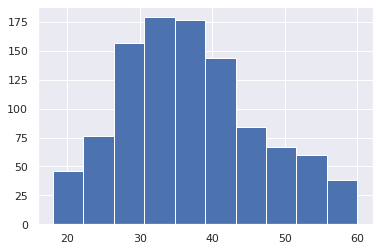

In [49]:
# Plot and modify the histogram of Age
plt.hist(df.Age)


(array([15.,  9., 22.,  7., 17., 52., 36., 75., 46., 45., 83., 51., 99.,
        41., 37., 59., 29., 56., 21., 27., 36., 12., 37., 18., 17., 27.,
        16., 13., 11., 14.]),
 array([18. , 19.4, 20.8, 22.2, 23.6, 25. , 26.4, 27.8, 29.2, 30.6, 32. ,
        33.4, 34.8, 36.2, 37.6, 39. , 40.4, 41.8, 43.2, 44.6, 46. , 47.4,
        48.8, 50.2, 51.6, 53. , 54.4, 55.8, 57.2, 58.6, 60. ]),
 <a list of 30 Patch objects>)

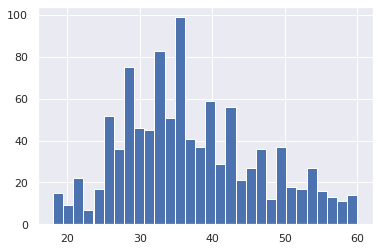

In [50]:
plt.hist(df.Age, bins=30)


Text(0.5, 1.0, 'Attrition vs Age')

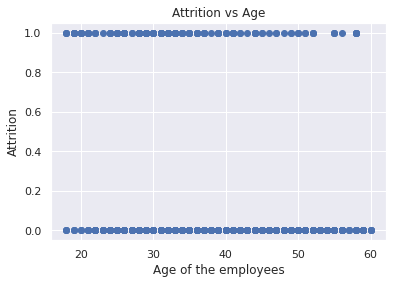

In [65]:
# Draw a scatter plot between Age and Attrition
  plt.scatter(df.Age, df.Attrition)
  plt.xlabel('Age of the employees')
  plt.ylabel('Attrition')
  plt.title('Attrition vs Age')

Find out whether people more than 50 years are more likely to leave the company. (Attrition = 1 means people have left the company).

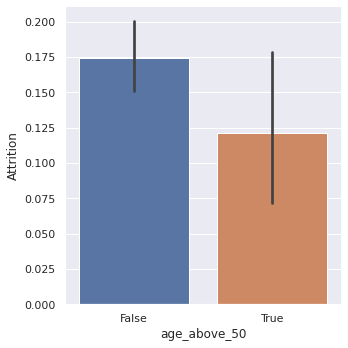

In [91]:
df['age_above_50'] = np.where(df['Age'] >= 50, 'True', 'False')
df.age_above_50
sns.set(style="darkgrid")
sns.catplot(x="age_above_50", y="Attrition", kind="bar", data=df);
# plt.subplot(1,2,2)



### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


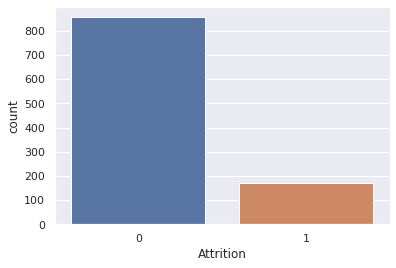

In [16]:
# Get a series of counts of values of Attrition
Attrition_counts = df.Attrition.value_counts()
print(Attrition_counts)

# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.set(style="darkgrid")
ax = sns.countplot(x="Attrition", data=df)



### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

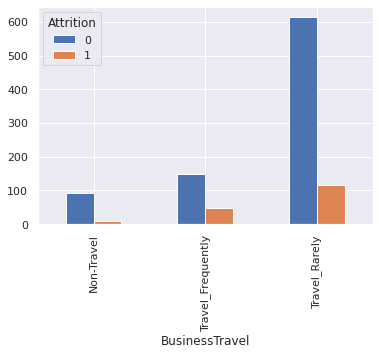

Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64


In [85]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 

ct = pd.crosstab(df.BusinessTravel, df.Attrition)
ct.plot.bar()
plt.show()
buisness_travel_counts = df.BusinessTravel.value_counts()
print(buisness_travel_counts)


### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Text(0, 0.5, 'number of attrition')

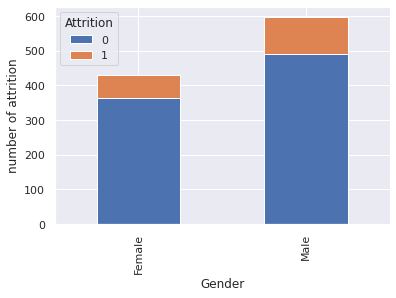

In [86]:
# Draw a stacked bar chart between Attrition and Gender 
t = pd.crosstab(df.Gender, df.Attrition)
t.plot(kind='bar', stacked=True)
plt.ylabel('number of attrition')



### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

(array([ 65.,  24.,  32., 108.,  87.,  54., 140., 133.,  19.,  61.,  17.,
         21.,  53.,  20.,  15.,  47.,  20.,  16.,  21.,  13.,   2.,  17.,
          6.,   9.,  14.,   3.,   1.,   7.,   1.,   2.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

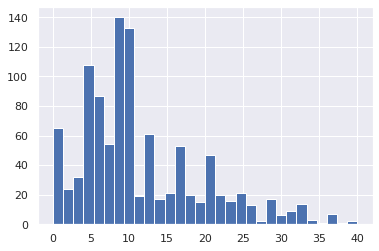

In [19]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears, bins=30)

# Draw a histogram of YearsAtCompany



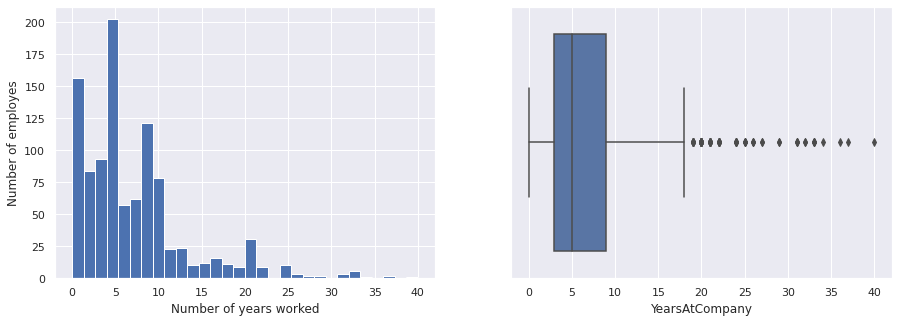

In [20]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df.YearsAtCompany, bins=30)
plt.ylabel('Number of employes')
plt.xlabel('Number of years worked')
plt.subplot(1,2,2)
sns.boxplot('YearsAtCompany', data=df)
#print('The value in the Years in the company are skewed as the data is mostly concetrated around 0 - 10')

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


In [21]:
df.MonthlyIncome.head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

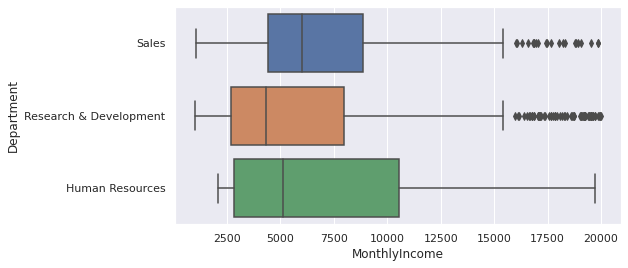

In [22]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
plt.figure(figsize=(8,4))
#movies['diff'] = movies['audience_score'] - movies['critics_score']
chart = sns.boxplot('MonthlyIncome', 'Department', data=df) #dataframr name data =df
# chart.set_xticklabels(
#     chart.get_xticklabels(), 
#     rotation=90, 
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large'
# )


In [23]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Age                            13.000000
Attrition                       0.000000
DailyRate                     691.500000
DistanceFromHome               11.000000
Education                       2.000000
EmployeeCount                   0.000000
EmployeeNumber                717.500000
EnvironmentSatisfaction         2.000000
HourlyRate                     35.000000
JobInvolvement                  1.000000
JobLevel                        2.000000
JobSatisfaction                 2.000000
MonthlyIncome                5843.500000
MonthlyRate                 12082.500000
NumCompaniesWorked              3.000000
PercentSalaryHike               6.000000
PerformanceRating               0.000000
RelationshipSatisfaction        2.000000
StockOptionLevel                1.000000
TotalWorkingYears              10.000000
TrainingTimesLastYear           1.000000
WorkLifeBalance                 1.000000
YearsAtCompany                  6.000000
YearsInCurrentRole              5.000000
YearsSinceLastPr

In [24]:
#To print the values of the outliers
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

        Age  Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0     False      False  ...                    False                 False
1     False      False  ...                    False                 False
2     False      False  ...                    False                 False
3     False      False  ...                    False                 False
4     False      False  ...                    False                 False
...     ...        ...  ...                      ...                   ...
1023  False      False  ...                    False                 False
1024  False      False  ...                    False                 False
1025  False      False  ...                    False                 False
1026  False      False  ...                    False                 False
1027  False      False  ...                    False                 False

[1028 rows x 35 columns]


TypeError: ignored

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

In [36]:
df.JobRole
JobRole_counts = df.JobRole.value_counts()
print(JobRole_counts)

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


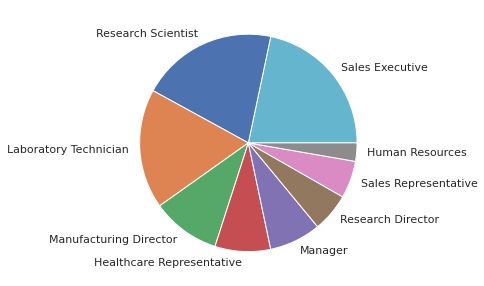

In [37]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
plt.figure(figsize=(5,5))
plt.pie(JobRole_counts)
#plt.pie(JobRole_counts, labels=JobRole_counts)
plt.pie(JobRole_counts, labels=JobRole_counts.index.tolist())
plt.show()
# Change the label of the pie chart 


